In [118]:
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "Mangal@123",
                             database = "ecommerce")

cur = db.cursor()

Basic Queries

1. List all unique cities where customers are located.

In [51]:
query = """ SELECT DISTINCT customer_city FROM customers"""
# count the unique customer city 

query1 = """ SELECT COUNT(DISTINCT customer_city) FROM customers"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


2. Count the number of orders placed in 2017.

In [49]:
query = """ SELECT 
                COUNT(order_id) 
            FROM orders  
            WHERE year(order_purchase_timestamp) = 2017
        """

cur.execute(query)

data = cur.fetchall()

"Number of orders placed in 2017",data[0][0]

('Number of orders placed in 2017', 45101)

3. Find the total sales per category.

In [50]:
query = """ SELECT 
                UPPER(p.product_category),
                ROUND(SUM(pay.payment_value),2) AS Total_sales
            FROM products AS p
            JOIN order_items AS o
            ON p.product_id = o.product_id 
            JOIN payments AS pay
            ON o.order_id = pay.order_id
            GROUP BY 1
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Category','Total_sales'])

df

,Category,Total_sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


4. Calculate the percentage of orders that were paid in installments.

In [31]:
query = """ SELECT 
                ((SUM(CASE WHEN payment_installments >= 1 THEN 1  ELSE 0 END)) / COUNT(*))  * 100
            FROM payments  
        """

cur.execute(query)

data = cur.fetchall()

"The percentage of orders that were paid in installments is",data 

('The percentage of orders that were paid in installments is',
 [(Decimal('99.9981'),)])

5. Count the number of customers from each state. 

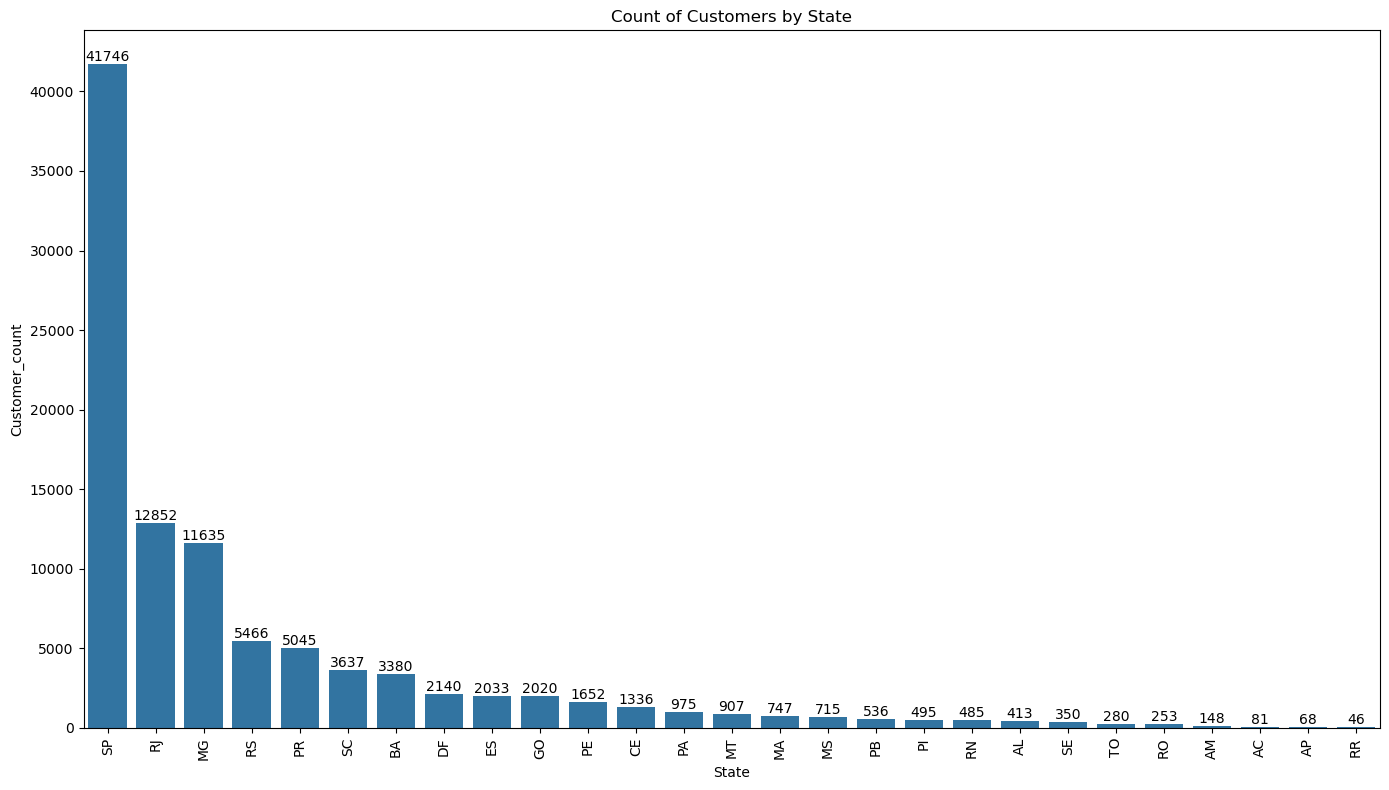

In [92]:
query = """ SELECT 
                customer_state,
                COUNT(customer_id)
            FROM customers
            GROUP BY 1
            ORDER BY 2 DESC"""
            
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['State','Customers'])



plt.figure(figsize = (14,8))
ax = sns.barplot(x = df['State'], y = df['Customers'], data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('State')
plt.ylabel('Customer_count')
plt.xticks(rotation  = 90)
plt.title("Count of Customers by State")
plt.tight_layout()
plt.show()

Intermediate Queries

1. Calculate the number of orders per month in 2018.

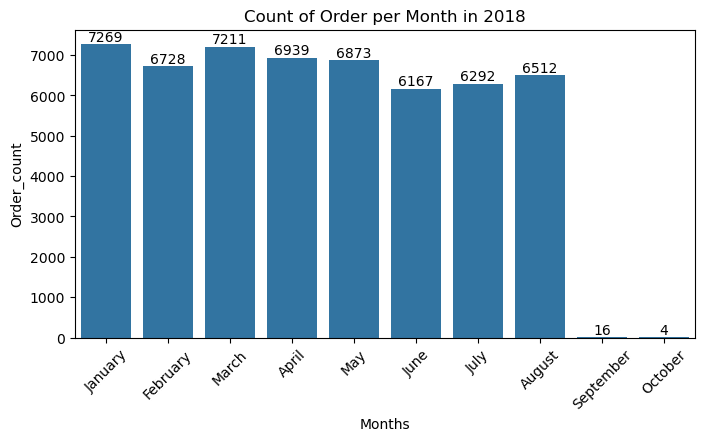

In [94]:
query = """ SELECT 
                MONTHNAME(order_purchase_timestamp),
                COUNT(order_id)
            FROM orders 
            WHERE YEAR(order_purchase_timestamp) = 2018
            GROUP BY 1
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["Months","Orders"])

o = ['January','February','March','April','May','June','July','August','September','October']

plt.figure(figsize=(8,4))
ax = sns.barplot(x=df['Months'], y=df['Orders'], data = df, order = o)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation = 45)
plt.xlabel('Months')
plt.ylabel('Order_count')
plt.title("Count of Order per Month in 2018")
plt.show()

2. Find the average number of products per order, grouped by customer city.

In [ ]:
query = """WITH count_per_order AS 
           (
            SELECT 
                o.order_id,
                o.customer_id,
                COUNT(oi.order_id) AS oc
            FROM orders AS o
            JOIN order_items AS oi
            ON o.order_id = oi.order_id
            GROUP BY 1,2
            )
            SELECT 
                c.customer_city,
                ROUND(AVG(count_per_order.oc),2) AS average_orders
            FROM customers AS c
            JOIN count_per_order
            ON c.customer_id = count_per_order.customer_id
            GROUP BY 1
            ORDER BY 2 DESC
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Customer City','Average_Products_Per_Order'])
df.head(10)

,Customer City,Average_Products_Per_Order
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,cidelandia,4.00
6,picarra,4.00
7,morro de sao paulo,4.00
8,teixeira soares,4.00
9,curralinho,4.00


3. Calculate the percentage of total revenue contributed by each product category.

In [113]:
query = """ SELECT 
                UPPER(p.product_category),
                ROUND(SUM(pay.payment_value)  / (SELECT SUM(payment_value) FROM payments) * 100 ,2) AS Percentage_Of_Total_Revenue
            FROM products AS p
            JOIN order_items AS o
            ON p.product_id = o.product_id 
            JOIN payments AS pay
            ON o.order_id = pay.order_id
            GROUP BY 1
            ORDER BY 2 DESC
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Category','Percentage_Distribution'])

df

,Category,Percentage_Distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


4. Identify the correlation between product price and the number of times a product has been purchased.

In [121]:
query = """SELECT 
                p.product_category,
                COUNT(oi.product_id),
                ROUND(AVG(oi.price),2)
            FROM products AS p 
            JOIN order_items AS oi
            ON p.product_id = oi.product_id
            GROUP BY 1
            ORDER BY 2 DESC
        """
        
cur.execute(query)
        
data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Category','Order_Count','Price'])


arr1 = df['Order_Count']
arr2 = df['Price']

a = np.corrcoef([arr1,arr2])
print("The Correlation Between price and number of times has been purchased is ",a[0][1])

The Correlation Between price and number of times has been purchased is  -0.10631514167157564


5. Calculate the total revenue generated by each seller, and rank them by revenue.

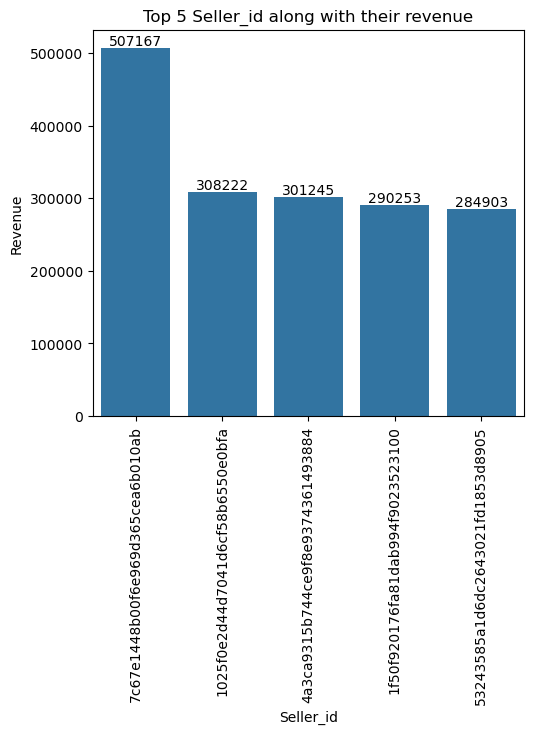

In [151]:
query = """ SELECT 
                *,
                DENSE_RANK() OVER(ORDER BY revenue DESC) AS rn
            FROM 
            (
            SELECT 
                oi.seller_id,
                ROUND(SUM(p.payment_value),2) AS revenue
            FROM order_items AS oi
            JOIN payments AS p
            ON oi.order_id = p.order_id
            GROUP BY 1
            ORDER BY 2 DESC
            ) AS a
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Seller_id','Revenue','Rank'])
df = df.head()

ax = sns.barplot(x='Seller_id',y='Revenue',data=df)
ax.bar_label(ax.containers[0])
plt.title("Top 5 Seller_id along with their revenue")
plt.xlabel('Seller_id')
plt.ylabel('Revenue')
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()


Advanced Queries

1. Calculate the moving average of order values for each customer over their order history.

In [156]:
query = """ SELECT 
                customer_id,
                order_purchase_timestamp,
                payment,
                AVG(payment) OVER(PARTITION BY customer_id ORDER BY order_purchase_timestamp ROWS BETWEEN 2 PRECEDING AND CURRENT ROW) AS mov_avg
            FROM
            (
            SELECT 
                o.customer_id,
                o.order_purchase_timestamp,
                p.payment_value AS payment
            FROM payments AS p
            JOIN orders AS o
            ON p.order_id = o.order_id
            ) AS a
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Customer_id','Order_Purchase_Timestamp','Payment','Mov_AVG'])
df

,Customer_id,Order_Purchase_Timestamp,Payment,Mov_AVG
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


2. Calculate the cumulative sales per month for each year.

In [165]:
query = """ SELECT 
                years,
                months,
                payment,
                SUM(payment) OVER(ORDER BY years,months)  cumulative_sales
            FROM
            (
            SELECT 
                YEAR(o.order_purchase_timestamp) AS years,
                MONTH(o.order_purchase_timestamp) AS months,
                ROUND(SUM(p.payment_value),2) AS payment
            FROM orders AS o
            JOIN payments AS p
            ON o.order_id = p.order_id
            GROUP BY 1,2
            ORDER BY 1,2
            ) AS a
        """ 
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Year','Month','Sales','Cumulative Sales'])
df

,Year,Month,Sales,Cumulative Sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


3. Calculate the year-over-year growth rate of total sales.

In [172]:
query = """ WITH a AS
            ( 
                SELECT 
                    YEAR(o.order_purchase_timestamp) AS years,
                    ROUND(SUM(p.payment_value),2) AS payment
                FROM orders AS o
                JOIN payments AS p
                ON o.order_id = p.order_id
                GROUP BY 1
                ORDER BY 1
            )
            SELECT 
                years,
                (payment - lag(payment,1) over(order by years)) / (lag(payment,1) over(order by years)) * 100
                
            FROM a
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ['Year','yoy %  growth'])
df

,Year,yoy % growth
0,2016,NaN
1,2017,12112.703761
2,2018,20.000924


4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [176]:
query = """ WITH a AS 
            (
                SELECT 
                    c.customer_id,
                    MIN(o.order_purchase_timestamp) AS first_order
                FROM customers AS c
                JOIN orders AS o
                ON c.customer_id = o.customer_id
                GROUP BY 1
            ),
            b AS
            (
                SELECT 
                    a.customer_id,
                    COUNT(DISTINCT o.order_purchase_timestamp) AS next_order
                FROM a 
                JOIN orders AS o
                ON o.customer_id = a.customer_id
                AND o.order_purchase_timestamp > first_order
                AND o.order_purchase_timestamp < date_add(first_order, interval 6 month)
                GROUP BY 1
            )
            
            SELECT 
                100 * (COUNT(DISTINCT a.customer_id) / COUNT(DISTINCT(b.customer_id)))
            FROM a 
            LEFT JOIN b
            ON a.customer_id = b.customer_id
            
            
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data)
df

,0
0,None


5. Identify the top 3 customers who spent the most money in each year.

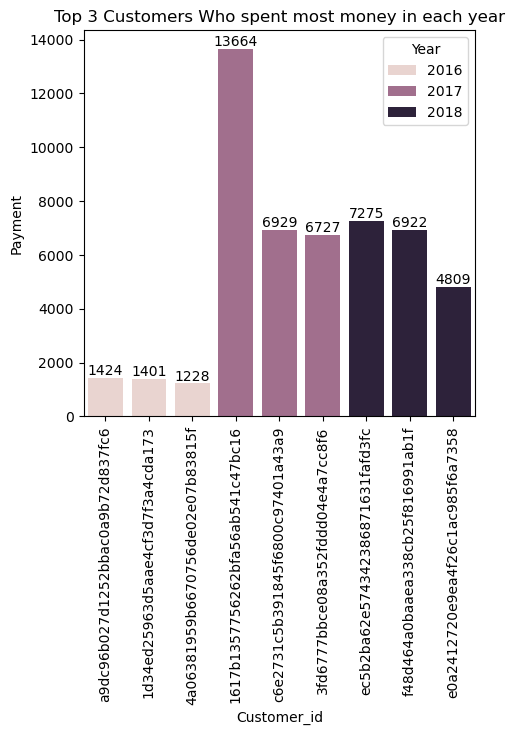

In [193]:
query = """ SELECT 
                years,
                customer_id,
                payment,
                d_rank
            FROM
            (
                SELECT 
                    YEAR(o.order_purchase_timestamp) AS years,
                    o.customer_id,
                    ROUND(SUM(p.payment_value),0) AS payment,
                    DENSE_RANK() OVER(PARTITION BY YEAR(o.order_purchase_timestamp) ORDER BY SUM(p.payment_value) DESC) AS d_rank
                FROM orders AS o
                JOIN payments AS p
                ON o.order_id = p.order_id
                GROUP BY 1,2
            ) AS a
            WHERE d_rank < 4
        """
        
cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ['Year','Customer_id','Payment','Rank'])

ax =sns.barplot(x = 'Customer_id',y='Payment',data = df,hue='Year')
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Top 3 Customers Who spent most money in each year")
plt.tight_layout()
plt.xticks(rotation = 90)
plt.show()